## **Descriptive Statistics**

# **Measure of Central Tendency**

파이썬은 그 자체로는 아주 기본적인 기능을 제공하므로 그러한 기본 기능으로만 프로그램을 짜기에는 너무나 많은 노력을 필요로 합니다.

그러나 '거인의 어깨 위에 올라선다'는 표현이 있듯이 다른 사람들이 이미 만들어둔 파이썬 프로그램을 활용하면 코딩이 한결 편리해집니다.


여기에서도 다른 사람들이 만들어둔 프로그램인 numpy와 pandas, matplotlib, seaborn을 활용할 것입니다.

In [48]:
import numpy as np  
import pandas as pd
from matplotlib import pyplot as plt


nk_missiles = pd.read_csv('/content/nkmissile.csv')


*   numpy를 가져오되, 그 이름을 앞으로는 np라고 부르기로 합니다. numpy 프로그램 속의 함수를 활용할 때마다 numpy를 언급해줘야 하는데 np라고 부르면 더 짧아서 편리하기 때문입니다.
*   pandas도 불러온 뒤, pd라고 부르기로 합니다.
* matplotlib은 너무 큰 프로그램이라서 그 중에서도 pyplot이라는 프로그램만 가져오기로 합니다. plt라고 부르기로 합시다.

* 참고로 np, pd, plt로 부를 의무는 없습니다. 원하시는 다른 이름을 붙이셔도 좋습니다.




> numpy는 리스트([1, 2, 3]과 같은 것)끼리의 연산을 다룰 때 편리하고 (가령, 1, 2, 3의 평균이나 표준편차 계산 등)



> pandas는 파이썬의 엑셀과 같아서 표로 정리할 수 있는 데이터를 다루는 데에 좋으며,



> pyplot이나 나중에서 뒤에서 보시게 될 seaborn은 데이터로 그림을 그릴 때 사용합니다.









*   **pd.read_csv** : pandas 속의 read_csv 함수를 활용해서 지정된 경로 속의 csv(comma-separated values) 파일을 읽어들입니다. (참고: csv 파일을 엑셀로도 열어보시고, 메모장으로도 열어보십시오.)
*   읽어들인 결과를 nk_missile이라는 이름으로 저장해둡니다.



In [ ]:
nk_missiles.tail()

제대로 읽어들였는지 확인해보기 위해서 nk_missiles를 한 번 봅니다.


그런데 표가 너무 클 수 있어서 (실제로 한 화면에 출력하기에는 큽니다) 꼬리 부분만 봅니다. (머리 부분을 보려면 head를 입력합니다.)

In [49]:
filtered_nk_missiles = nk_missiles[nk_missiles['Distance Travelled'].notnull()]


* 오늘은 'Distance Travelled' 칼럼을 볼 것입니다. 즉 미사일의 이동 거리만을 분석해보고자 합니다. 참고로 pandas에서는 대괄호를 통해서 칼럼을 지정해줍니다.

*  'Distance Travelled' 칼럼에서 결측치(없는 값)로 나타나는 미사일은 분석 대상에서 제외하여 새로운 표를 만듭니다.

* 구글 검색(검색어: "select not nan rows pandas")에서 찾은 명령어입니다.

https://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings 
 


In [ ]:
filtered_nk_missiles['Distance Travelled'] = filtered_nk_missiles['Distance Travelled'].astype(float)

이동거리가 숫자로 표시되어 있는 것 같지만, 평균을 구하고 그러려고 해보니깐 에러가 뜨는 겁니다. 그 이유는 역시 해당 정보가 숫자가 아닌 문자(활자)의 형태로 인식이 되고 있기 때문이었습니다.

그래서 문자(활자)를 숫자(float)로 (이른바 자료형-data type-을) 바꿔주고자 위와 같은 작업을 하는 것입니다.

*   물론, 위의 코드도 구글링(검색어: pandas string to float)으로 찾았습니다.
https://datatofish.com/convert-string-to-float-dataframe/

In [7]:
distances = filtered_nk_missiles['Distance Travelled']

In [ ]:
distances

미사일들의 이동거리들을 distances라는 이름으로 저장하고 그 결과를 한 번 확인해봅니다.

In [ ]:
distances.describe()

요약 통계를 확인합니다. "Descriptive" statistics입니다.

In [ ]:
mean_distance = np.mean(distances)
median_distance = np.median(distances)
mode_distance=filtered_nk_missiles['Distance Travelled'].mode().iat[0]

print(mean_distance)
print(median_distance)

# Plot the figure
plt.hist(distances, bins = 10, edgecolor='black')
plt.title("Travelled Distances of North Korean Missile Tests")
plt.xlabel("Distances (km)")
plt.ylabel("Count")
plt.axvline(mean_distance, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median_distance, color='y', linestyle='solid', linewidth=2, label="Median")
plt.axvline(mode_distance, color='lightgreen', linestyle='solid', linewidth=2, label="Mode")

plt.legend()   

plt.show()



*   **np.mean(distances)** : 미사일들의 이동거리들에서 평균을 구합니다. numpy 속의 mean 함수를 사용했습니다.
*   **np.median(distances)** : 중앙값, 중간값을 구합니다. numpy의 도움을 받았습니다.

* **plt.hist**: 등간격 10칸(bins)으로 구분된 히스토그램을 그립니다. 이동거리들의 도수(freqeuncy)를 나타냅니다. 테두리를 검정색(black)으로 칠합니다. 이런 옵션들은 역시 구글링이나 plt(pyplot)의 공식 홈페이지에서 찾고 적용합니다.

* **plt.title**: 제목을 답니다.
* **plt.xlabel** : x 축에 이름을 답니다.
* **plt.ylabel** : y 축에 이름을 답니다.

* **plt.axvline** : 직선을 그려줍니다. 평균(mean_distance라고 아까 이름을 붙였던 값)을 표시하는 직선을 그릴 것입니다. 색깔은 빨간색, 두께는 2, 표시는 'Mean'으로 해줍니다. 직선 스타일은 solid라는 것으로 해보았습니다. 이런 옵션들 또한 구글링이나 plt 공식 홈페이지에서 찾습니다.

* 참고로 위의 axvline 함수 또한 구글링으로 찾은 것입니다.
(구글 검색어: pyplot draw straight line)
https://stackoverflow.com/questions/12864294/adding-an-arbitrary-line-to-a-matplotlib-plot-in-ipython-notebook

* **plt.legend()**: axvline 함수를 쓰면서 범례("Mean"과 "Median")를 적었는데, 범례를 의미하는 legend 함수를 다시 한 번 적어줘야 완료가 됩니다. (나중에 데이터 시각화 시간에 다룰 예정이니 지금은 넘어가셔도 좋습니다.)

* **plt.show()**: 그림을 컴퓨터의 화면으로 출력해줍니다.




In [ ]:
mean_distance = np.mean(distances)
median_distance = np.median(distances)
first_quarter = np.percentile(distances, 25)
third_quarter = np.percentile(distances, 75)

print(mean_distance)
print(median_distance)
print(first_quarter)
print(third_quarter)

# Plot the figure
plt.hist(distances, bins = 30, edgecolor='black')
plt.title("Travelled Distances of North Korean Missile Tests")
plt.xlabel("Distances (km)")
plt.ylabel("Count")
plt.axvline(mean_distance, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median_distance, color='y', linestyle='solid', linewidth=2, label="Median")
plt.axvline(first_quarter, color='lawngreen', linestyle='solid', linewidth=2, label="25th Percentile")
plt.axvline(third_quarter, color='magenta', linestyle='solid', linewidth=2, label="75th Percentile")

plt.legend()

plt.show()



*   **np.percentile** : numpy의 도움을 받아서 분위수를 구합니다.
*   또 그걸 다시 실선으로 그려줍니다.



In [ ]:
plt.boxplot(distances, vert=0)

plt.xlabel('Distance Travelled (km)')
plt.ylabel('NK Missiles')
plt.title('Travelled Distances of Tested North Korean Missiles')

plt.yticks([])


plt.show()

* plt.yticks([ ]) : 이 코드가 없을 경우와 비교해보시면 용도를 파악하실 수 있습니다. 이 역시 구글링(검색어: remove y tick labels matplotlib)으로 찾은 것입니다.

https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots

In [ ]:
filtered_nk_missiles.sort_values(by='Distance Travelled', ascending=False).head()



*   **아웃라이어 1**: 117번째 미사일. 2017년 9월 14일(미국시간)에 발사한 화성 12호. (*3700km*)
*   **아웃라이어 2**: 116번째 미사일. 2017년 8월 28일(미국시간)에 발사한 화성 12호. (*2700km*)
*   **아웃라이어 3**: 16번째 미사일. 1998년 8월 31일(미국시간)에 발사한 대포동 1호. (*1380km*)



# **화성 12호**

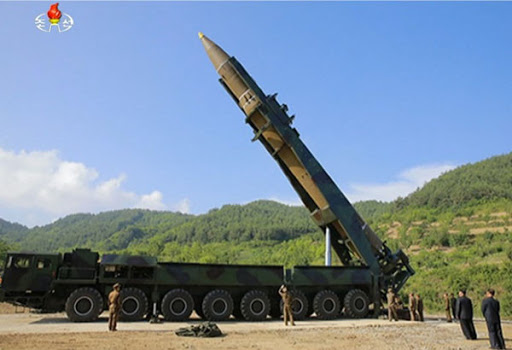

https://missilethreat.csis.org/missile/hwasong-12/

# **Measure of Dispersion**

In [ ]:
distances.describe()

In [ ]:
distances.std()

In [17]:
IQR = np.percentile(distances, 75) - np.percentile(distances, 25)

In [ ]:
print(IQR)

In [ ]:
distances.var()

In [ ]:
np.sqrt(distances.var())

In [ ]:
one_right = distances.mean()+distances.std()
one_left = distances.mean()-distances.std()

print(one_right)
print(distances.mean())
print(one_left)

# Plot the figure
plt.hist(distances, bins = 10, edgecolor='black')
plt.title("Travelled Distances of North Korean Missile Tests")
plt.xlabel("Distances (km)")
plt.ylabel("Count")
plt.axvline(one_right, color='r', linestyle='solid', linewidth=2, label="One SD Right")
plt.axvline(mean_distance, color='orange', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(one_left, color='y', linestyle='solid', linewidth=2, label="One SD Left")

plt.legend()

plt.show()

In [ ]:
one_right = distances.mean()+distances.std()
one_left = distances.mean()-distances.std()

print(one_right)
print(distances.mean())
print(one_left)

# Plot the figure
plt.hist(distances, bins = 30, edgecolor='black')
plt.title("Travelled Distances of North Korean Missile Tests")
plt.xlabel("Distances (km)")
plt.ylabel("Count")
plt.axvline(one_right, color='r', linestyle='solid', linewidth=2, label="One SD Right")
plt.axvline(one_left, color='r', linestyle='solid', linewidth=2, label="One SD Left")

plt.legend()

plt.show()

In [ ]:
one_right = distances.mean()+distances.std()
one_left = distances.mean()-distances.std()

print(one_right)
print(distances.mean())
print(one_left)

# Plot the figure
plt.hist(distances, bins = 70, edgecolor='black')
plt.title("Travelled Distances of North Korean Missile Tests")
plt.xlabel("Distances (km)")
plt.ylabel("Count")
plt.axvline(one_right, color='r', linestyle='solid', linewidth=2, label="One SD Right")
plt.axvline(one_left, color='r', linestyle='solid', linewidth=2, label="One SD Left")

plt.legend()

plt.show()

In [ ]:
one_right = distances.mean()+distances.std()
one_left = distances.mean()-distances.std()

print(one_right)
print(distances.mean())
print(one_left)

# Plot the figure
plt.hist(distances, bins = 70, edgecolor='black')
plt.title("Travelled Distances of North Korean Missile Tests")
plt.xlabel("Distances (km)")
plt.ylabel("Count")
plt.axvline(one_right, color='r', linestyle='solid', linewidth=2, label="One SD Right")
plt.axvline(one_left, color='r', linestyle='solid', linewidth=2, label="One SD Left")
plt.axvline(first_quarter, color='lawngreen', linestyle='solid', linewidth=2, label="25th Percentile")
plt.axvline(third_quarter, color='lawngreen', linestyle='solid', linewidth=2, label="75th Percentile")
plt.legend()

plt.show()

In [ ]:
import seaborn as sns

sns.swarmplot(distances)
sns.boxplot(distances, color='seashell')

plt.xlabel('Distance Travelled (km)')
plt.ylabel('NK Missiles')
plt.title('Travelled Distances of Tested North Korean Missiles')

plt.yticks([])


plt.show()


*   Box Plot을 더 예쁘게 그리고 또 그 위에 데이터를 점 찍듯이 나열해보려면, **Seaborn**이라는 새로운 패키지를 씁니다. (Pyplot보다 한 단계 더 발전된 패키지라고 보셔도 좋습니다.)
*  **Swarm Plot** : 데이터를 중첩되지 않게 그림으로 그 분포를 나타냅니다.



## **Probability Density Function**

In [ ]:
pdf = distances.plot.kde(label='')

plt.axvline(mean_distance, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median_distance, color='y', linestyle='solid', linewidth=2, label="Median")
plt.axvline(mode_distance, color='b', linestyle='solid', linewidth=2, label="Mode")

plt.title("PDF of Distances Travelled of NK Missiles")
plt.xlabel('Distances (km)')

plt.legend()
plt.show()